# Подготовка прототипа модели для металлообрабатывающего предприятия

## Описание проекта

Необходимо составить модель, которая должна предсказать коэффициент восстановления золота из золотосодержащей руды на основании данных с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.


___

# 1. Подготовка данных

Загрузим необходимые библиотеки и откроем файлы с тренировочными и тестовыми данными.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.multioutput import RegressorChain, MultiOutputRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
df_train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_test.head(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

___

Вычислим, насколько правильно рассчитана эффективность обогащения на флотации. Выделим отдельный датасет с необходимыми параметрами и удалим из него пропуски.

In [7]:
rec_calc_df = df_train[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']]

In [8]:
rec_calc_df.dropna(inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
rec_calc_df

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery
0,19.793808,6.486150,1.170244,87.107763
1,20.050975,6.478583,1.184827,86.843261
2,19.737170,6.362222,1.162562,86.842308
3,19.320810,6.118189,1.079755,87.226430
4,19.216101,5.663707,1.012642,86.688794
...,...,...,...,...
16855,18.603550,5.335862,0.748633,89.574376
16856,18.441436,4.838619,0.771582,87.724007
16857,15.111231,4.525061,0.685059,88.890579
16858,17.834772,4.362781,0.567130,89.858126


Рассчитаем эффективность по формуле.

In [10]:
recovery_calc = pd.Series(
    ((rec_calc_df['rougher.output.concentrate_au'] * (rec_calc_df['rougher.input.feed_au'] - rec_calc_df['rougher.output.tail_au'])) / 
    (rec_calc_df['rougher.input.feed_au'] * (rec_calc_df['rougher.output.concentrate_au'] - rec_calc_df['rougher.output.tail_au']))) * 100)
      

И посчитаем среднюю абсолютную ошибку.

In [11]:
mean_absolute_error(df_train[df_train.index.isin(recovery_calc.index)]['rougher.output.recovery'], recovery_calc)

9.444891926100695e-15

Видно, что средняя абсолютная ошибка полученных данных близка к нулю. Это значит, что эфективность в датасете рассчитана правильно.  

___

Посмотрим, какие столбцы отсутствуют в тестовом датафрейме.  

In [12]:
list(set(df_train.columns) - set(df_test.columns))

['rougher.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_sol',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'final.output.recovery',
 'final.output.concentrate_ag',
 'rougher.calculation.au_pb_ratio',
 'final.output.concentrate_sol',
 'rougher.output.tail_pb',
 'rougher.output.concentrate_au',
 'final.output.tail_pb',
 'secondary_cleaner.output.tail_au',
 'final.output.concentrate_pb',
 'rougher.output.concentrate_ag',
 'rougher.output.tail_au',
 'final.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_pb',
 'final.output.tail_au',
 'final.output.tail_ag',
 'rougher.outp

Можно увидеть, что это признаки, описывающие параметры выходного продукта, а так же рассчетные признаки. Вероятнее всего эти признаки рассчитываются позднее. Эти признаки лучше не использовать при обучении модели, так как на производстве модель, вероятнее всего, будет работать также без информации об этих признаках.

In [13]:
df_train.drop(list(set(df_train.columns) - set(df_test.columns)), axis=1, inplace=True)

In [14]:
len(df_train)

16860

При этом из полного датасета в тренировочный и тестовый следует добавить целевые признаки - rougher.output.recovery и final.output.recovery. Эти признаки можно добавить, используя дату как ключ (замеры проведены каждый через один час)

In [15]:
df_train = pd.merge(df_train, df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')

In [16]:
df_test = pd.merge(df_test, df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')

___

Далее выполним предобработку данных. Заполнять целевые признаки какими-либо значениями было бы неправильно, поэтому просто удалим строчки с пропусками в них.

In [17]:
df_train.dropna(subset=['rougher.output.recovery'], inplace=True)
df_train.dropna(subset=['final.output.recovery'], inplace=True)

In [18]:
df_test.dropna(subset=['rougher.output.recovery'], inplace=True)
df_test.dropna(subset=['final.output.recovery'], inplace=True)

Значения остальных параметров достаточно близки, и, так как между замерами был небольшой промежуток по времени, остальные пропущенные значения можно заменить с помощью fillna используя метод ffill, который заменит NaN на значение следующей численной записи. 

In [19]:
df_train.fillna(method = 'ffill', inplace=True)
df_test.fillna(method = 'ffill', inplace=True)

Посмотрим, влияет ли дата на эфффективность обогащения. Для этого создадим функцию, которая создаст столбец с годом.

In [20]:
def get_year(row):
    date = pd.to_datetime(row['date'])
    year = date.year
    return int(year)

In [21]:
df_full['year'] = df_full.apply(get_year, axis=1)

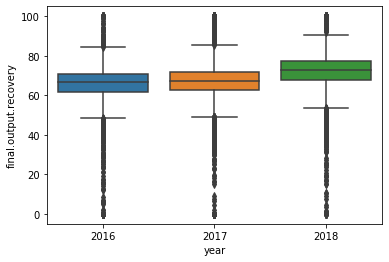

In [22]:
sns.boxplot(x='year', y='final.output.recovery', data=df_full)

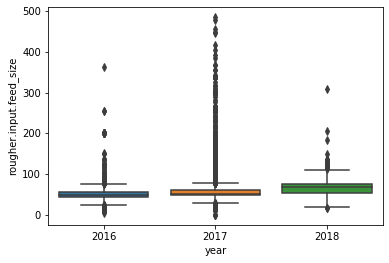

In [23]:
sns.boxplot(x='year', y='rougher.input.feed_size', data=df_full)

Видно, что эффективность обогащения меняется, однако меняются так же и другие параметры. В стаком случае стоит проверить статистическую значимость этого изменения.

In [24]:
df_train['year'] = df_train.apply(get_year, axis=1)

Проверим распределения на нормальность c помощью теста д'Агостино. Нулевая гипотеза будет гласить что данные по обоим годам распределены нормально.

In [25]:
from scipy.stats import normaltest

alpha = .05

_, p1 = normaltest(df_train[df_train['year']==2018]['final.output.recovery'])
_, p2 = normaltest(df_train[df_train['year']==2017]['final.output.recovery'])

if ((p1 < alpha) & (p2 < alpha)):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Так как распределение не нормальное, для проверки будем использовать U-тест Манна-Уитни. Нулевая гипотеза будет гласить, что средняя эффективность обогащения за 2018 и 2017 год одинакова.

In [26]:
from scipy.stats import mannwhitneyu

results = mannwhitneyu(df_train[df_train['year']==2018]['final.output.recovery'], 
                    df_train[df_train['year']==2017]['final.output.recovery'])
            
print('p-значение:', results[1])

if (results[1] < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


Получается, что изменение эффективности от года статистически значимо, и, вероятно, растет с течением времени. Вероятнее всего это связано с изменением некоторых других параметров, возможно нам неизвестных. 

In [27]:
df_test.drop('date', axis=1, inplace=True)
df_train.drop('date', axis=1, inplace=True)

In [28]:
df_train.drop('year', axis=1, inplace=True)

### Вывод

В данном разделе была проведена предобработка данных. Из тренировочного датасета удалены признаки, не используемые при тесте. В оба датасета добавлены столбцы с целевыми переменными. Проверенна правильность рассчета эффективности обогащения. Средняя абсолютная ошибка между вычисленными по формуле и находящимеся в датасете данными близка к 0.

# 2. Анализ данных

In [29]:
plt.rcParams['figure.figsize'] = (20.0, 10.0) # изменим дефолтный размер графиков для более удобного восприятия

Посмотрим, как меняется концентрация металлов в зависимости от времени этапа обогащения. Построим сводную таблицу по средним значениям содержаний на каждом этапе.

In [30]:
df_conc=df_full[['final.output.concentrate_ag', 'final.output.concentrate_pb',
        'final.output.concentrate_sol', 'final.output.concentrate_au',
        'rougher.input.feed_ag', 'rougher.input.feed_pb',
        'rougher.input.feed_sol', 'rougher.input.feed_au', 
        'primary_cleaner.output.concentrate_ag',
        'primary_cleaner.output.concentrate_pb',
        'primary_cleaner.output.concentrate_sol',
        'primary_cleaner.output.concentrate_au', 
        'rougher.output.concentrate_ag',
        'rougher.output.concentrate_pb', 
        'rougher.output.concentrate_sol',
        'rougher.output.concentrate_au']].mean()

In [31]:
data_for_conc = {'au': [df_conc['rougher.input.feed_au'], df_conc['rougher.output.concentrate_au'], 
                        df_conc['primary_cleaner.output.concentrate_au'], df_conc['final.output.concentrate_au']], 
                 'ag': [df_conc['rougher.input.feed_ag'], df_conc['rougher.output.concentrate_ag'], 
                        df_conc['primary_cleaner.output.concentrate_ag'], df_conc['final.output.concentrate_ag']], 
                 'pb': [df_conc['rougher.input.feed_pb'], df_conc['rougher.output.concentrate_pb'], 
                        df_conc['primary_cleaner.output.concentrate_pb'], df_conc['final.output.concentrate_pb']], 
                'sol': [df_conc['rougher.input.feed_sol'], df_conc['rougher.output.concentrate_sol'], 
                        df_conc['primary_cleaner.output.concentrate_sol'], df_conc['final.output.concentrate_sol']]}

In [32]:
df_conc = pd.DataFrame.from_dict(data=data_for_conc, orient='index',
                                 columns=['input', 'rougher', 'primary_cleaner', 'secondary_cleaner'])

In [33]:
df_conc

,input,rougher,primary_cleaner,secondary_cleaner
au,7.565838,17.879538,29.212289,40.001172
ag,8.065715,10.874484,7.691652,4.781559
pb,3.305676,6.900646,8.921110,9.095308
sol,33.276016,26.095508,9.573672,8.640317


Более наглядно представим её в виде графика.

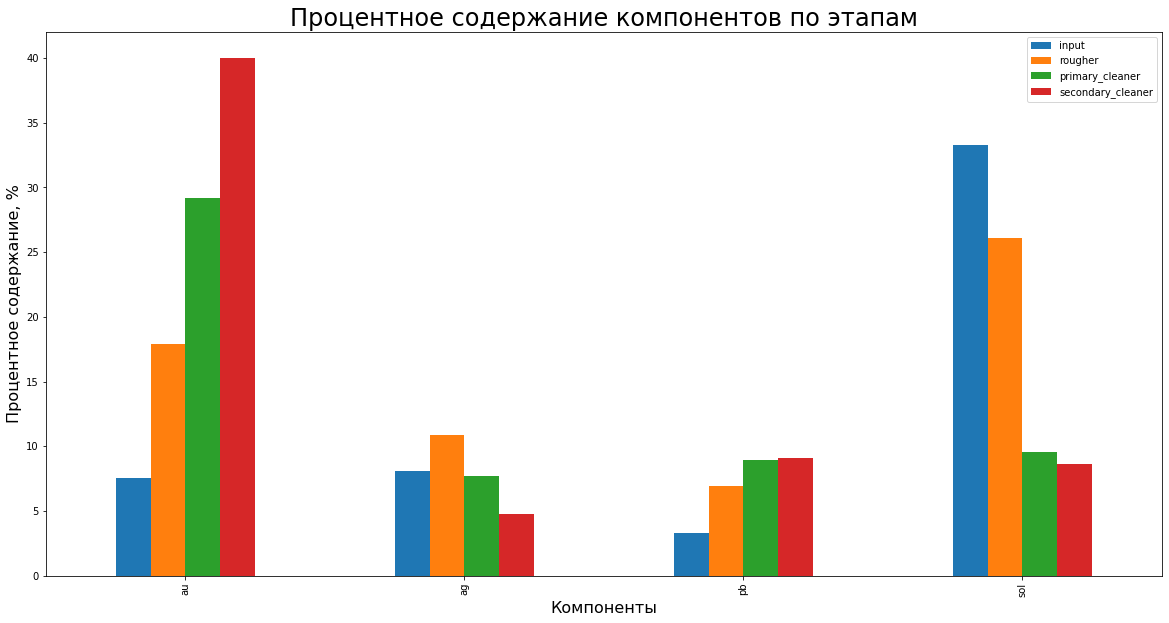

In [34]:
ax = df_conc.plot.bar()
plt.title("Процентное содержание компонентов по этапам", fontsize=24)
ax.set_ylabel('Процентное содержание, %', fontsize=16)
ax.set_xlabel('Компоненты', fontsize=16);

Видно, что среднее содержание золота в концентрате растет с каждым этапом обогащения. (Чего и следовало ожидать). Содержание свинца в концентрате также растет на каждом этапе. Содержание серебра растет на этапе флотации и уменьшается на последующих этапах. Содержание примесей так же падает, и резко уменьшается после первого этапа очистки.  

<details>
  <summary>Элемент Sol</summary>
  <p>
      Не совсем понятно что подразуемевается под sol. Пояснений в тексте задания к этому как-то не нашел. Это не пустая порода (иначе бы сумма всех компонентов была равна практически 100%, да и непонятно почему такое обазначение было бы). Это могут быть золи, они конечно могут присутствовать при флотации, но это реагенты, а не часть породы, так что вероятнее всего это не они. Или растворимые вмещающие породы, но они тогда скорее отвалились бы уже на 1 этапе очистки. Или сульфидные руды, сульфидные золото-медные руды как раз и обогащают с помощью флотации, тогда все понятно, но в таком случае там должно быть sul)) 

___

Рассмотрим распределение гранулометрического состава в тренировочной и тестовой выборках. 

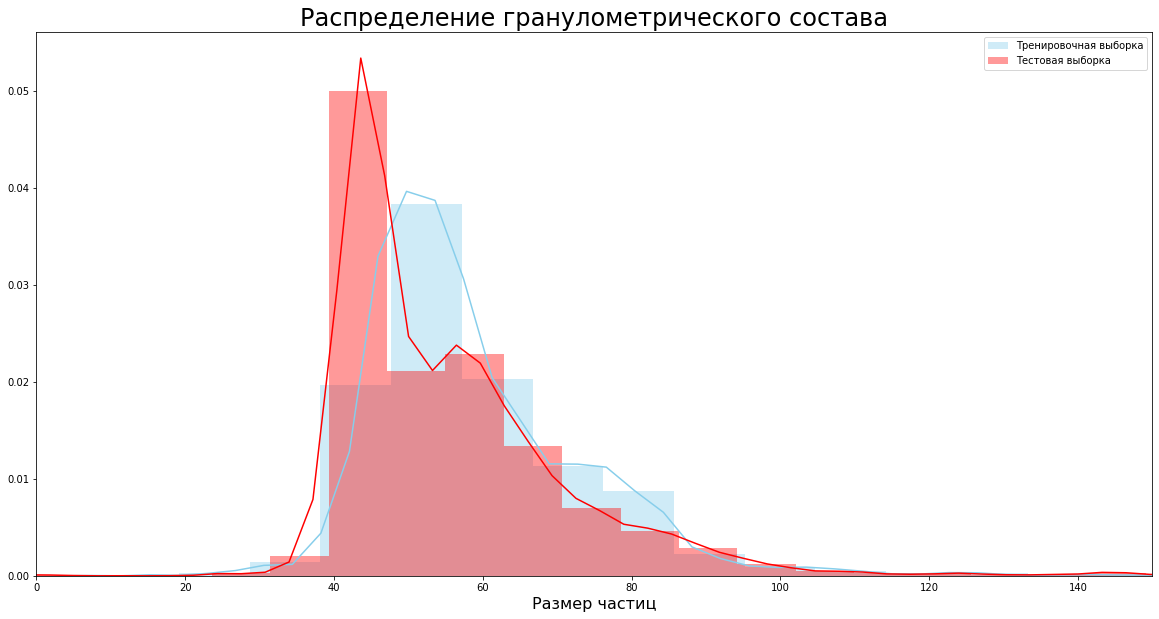

In [35]:
ax = sns.distplot(df_train['rougher.input.feed_size'], color="skyblue", label="Тренировочная выборка")
sns.distplot(df_test['rougher.input.feed_size'], color="red", label="Тестовая выборка")
plt.title("Распределение гранулометрического состава", fontsize=24)
ax.set_xlabel('Размер частиц', fontsize=16);
plt.xlim(0,150)
plt.legend()
plt.show()

In [36]:
print(df_train['rougher.input.feed_size'].median())
print(df_test['rougher.input.feed_size'].median())

55.269783890501536
50.8468431600362


Видно, что распределения достаточно сильно отличаются. Гранулы исходного сырья в тренировочной выборке крупнее. Проведем статистический анализ.

Проверим нормальность распределений.

In [37]:
_, p3 = normaltest(df_train['rougher.input.feed_size'])
_, p4 = normaltest(df_test['rougher.input.feed_size'])

if (p3 < alpha):
    print("Отвергаем нулевую гипотезу для первого распределения")
else:
    print("Не получилось отвергнуть нулевую гипотезу для первого распределени")
    
if (p4 < alpha):
    print("Отвергаем нулевую гипотезу для второго распределения")
else:
    print("Не получилось отвергнуть нулевую гипотезу для второго распределени")

Отвергаем нулевую гипотезу для первого распределения
Отвергаем нулевую гипотезу для второго распределения


Так-как распределения не нормальные используем тест Манна-Уитни

In [38]:
alpha = .05

results = mannwhitneyu(df_train['rougher.input.feed_size'], 
                       df_test['rougher.input.feed_size'])
            
print('p-значение:', results[1])

if (results[1] < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.3787583288418054e-112
Отвергаем нулевую гипотезу


Теперь можно сказать, что распределения действительно отличаются. В целом разброс значений одинаков, если судить по графику, но на 5 единиц отличается медиана. Это может повлиять на качество работы модели, однако в данном случае оставим все как есть. 

___

Исследуем суммарную концентрацию веществ на разных стадиях. Просуммируем данные по уже готовой сводной таблице.

In [39]:
df_conc.sum()

input                52.213245
rougher              61.750176
primary_cleaner      55.398722
secondary_cleaner    62.518357
dtype: float64

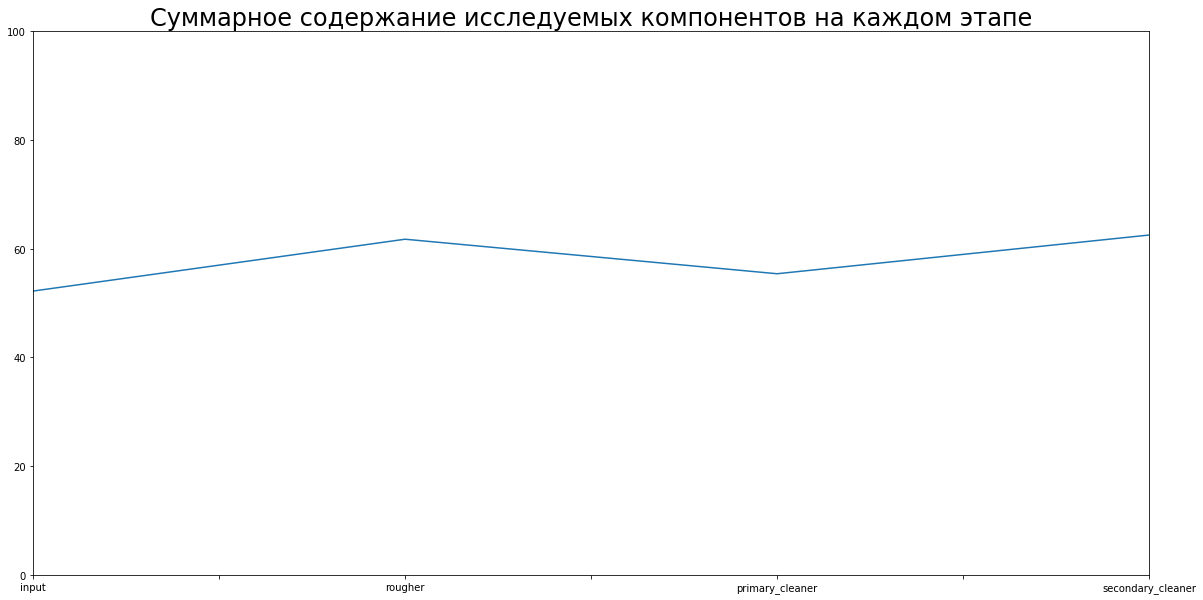

In [40]:
df_conc.sum().plot()
plt.title("Суммарное содержание исследуемых компонентов на каждом этапе", fontsize=24)
ax.set_ylabel('Процентное содержание, %', fontsize=16)
ax.set_xlabel('Этап', fontsize=16)
plt.ylim(0,100);

Видно, что в среднем содержания на каждом этапе растут. Падение просле первичной очистки обусловлено резким снижением количества растворимых примесей.  

Попробуем найти аномалии в полном датасете. Очевидно, что суммароное содержание не может быть больше 100 и меньше 0 процентов. Посчитаем суммарное содержание по каждому этапу для каждой записи.

In [41]:
df_full['sum_input'] = (df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_ag']
                          + df_full['rougher.input.feed_sol'] + df_full['rougher.input.feed_pb'])
df_full['sum_rougher'] = (df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_ag']
                          + df_full['rougher.output.concentrate_sol'] + df_full['rougher.output.concentrate_pb'])
df_full['sum_primary'] = (df_full['primary_cleaner.output.concentrate_au'] + df_full['primary_cleaner.output.concentrate_ag']
                          + df_full['primary_cleaner.output.concentrate_sol'] + df_full['primary_cleaner.output.concentrate_pb'])
df_full['sum_final'] = (df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_ag']
                          + df_full['final.output.concentrate_sol'] + df_full['final.output.concentrate_pb'])

In [42]:
df_full[['sum_input', 'sum_rougher', 'sum_primary', 'sum_final']].describe()

,sum_input,sum_rougher,sum_primary,sum_final
count,22241.000000,22526.000000,21918.000000,22328.000000
mean,52.273449,61.799418,55.471318,62.475148
std,17.653233,23.168341,19.757606,20.744652
min,0.000000,0.000000,0.000000,0.000000
25%,51.784664,63.558831,57.230377,67.200835
50%,56.939323,69.459530,61.957870,69.294183
75%,61.519755,74.058219,65.402045,71.165495
max,76.978947,90.964431,80.749343,80.210644


Видно, что данные соответствуют здравому смыслу. Суммарное содержание не превышает 100% и не менее 0%. Однако содержание в 0% вызывает сомнения, маловероятно что такая руда может попасть на обогатительную фабрику, и это можно объяснить ошибками измерений. удалим из тренировочной и тестовой выборки те записи, где суммарная концентрация на входе меньше 0,1%.

In [43]:
df_train['sum_input'] = (df_train['rougher.input.feed_au'] + df_train['rougher.input.feed_ag']
                          + df_train['rougher.input.feed_sol'] + df_train['rougher.input.feed_pb'])
df_test['sum_input'] = (df_test['rougher.input.feed_au'] + df_test['rougher.input.feed_ag']
                          + df_test['rougher.input.feed_sol'] + df_test['rougher.input.feed_pb'])

In [44]:
df_train.drop(df_train.loc[df_train['sum_input'] < 0.1].index, inplace=True)

In [45]:
df_test.drop(df_test.loc[df_test['sum_input'] < 0.1].index, inplace=True)

In [46]:
df_test.drop('sum_input', axis=1, inplace=True)
df_train.drop('sum_input', axis=1, inplace=True)

### Вывод

В данном разделе выполнен анализ предоставленных данных. Определен характер изменения концентраций составляющих рудную массу элементов в зависимости от этапа обогащения. В среднем концентрация золота ожидаемо растет на каждом этапе. Также было исследовано распределение размеров гранул сырья в тренировочной и тестовой выборке. Согласно полученной информации можно предположить, то средний размер гранул сырья в выборках различается, однако  в целом графики распределения схожи и данный факт не должен сильно влиять на качество модели. Из тренировочного и тестового датасета удалены записи, где суммарное содержание равно 0.

# 3. Модель

Для построения модели кажется наиболее правильным использовать метод RegressorChain. С помощью него можно сначала предсказать таргет rougher.recover, а после, на основании предсказанного final.recover.

Для начала напишем функцию итоговой sMAPE.

In [47]:
def sMAPE(y, y_pred):
    y = pd.DataFrame(y).reset_index(drop=True)
    y_pred = pd.DataFrame(y_pred).reset_index(drop=True)
    y_rougher = y.iloc[:, 0]
    y_final = y.iloc[:, 1]
    y_pred_rougher = y_pred.iloc[:, 0]
    y_pred_final = y_pred.iloc[:, 1]
    sMAPE_rougher = (((abs(y_rougher-y_pred_rougher))/((abs(y_rougher)+abs(y_pred_rougher))/2))*100).mean()
    sMAPE_final = (((abs(y_final-y_pred_final))/((abs(y_final)+abs(y_pred_final))/2))*100).mean()
    return 0.25 * sMAPE_rougher + 0.75 * sMAPE_final    

Обернем полученную функцию методом make_scorer, для того, чтобы её можно было использовать в кроссвалидации. 

In [48]:
sMAPE_scorer=make_scorer(sMAPE, greater_is_better=True)

В проверим как работают модели различных типов. Будем использовать обычную линейную регрессию, и случайный лес.

In [49]:
linear_regressor = RegressorChain(LinearRegression(), random_state=42)

In [50]:
forrest_regressor = RegressorChain(RandomForestRegressor(n_estimators=10, random_state=42), random_state=42)

Выделим целевые признаки тренировочного датасета.

In [51]:
X_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [52]:
y_train = df_train[['rougher.output.recovery', 'final.output.recovery']]

Проведем 5 кратную кроссвалидацию для каждой модели, чтобы узнать, какая из них работает качественнее.

In [53]:
linear_score = cross_val_score(linear_regressor, X_train, y_train, scoring=sMAPE_scorer, cv=5, n_jobs=-1)

In [54]:
print('Оценки sMAPE линейной модели на кроссвалидации:', linear_score)
print('Среднее sMAPE линейной модели на кроссвалидации:', linear_score.mean())

Оценки sMAPE линейной модели на кроссвалидации: [14.34920613  9.96977945 12.65402813 11.43831687 13.37886708]
Среднее sMAPE линейной модели на кроссвалидации: 12.358039534562906


In [55]:
forrest_score = cross_val_score(forrest_regressor, X_train, y_train, scoring=sMAPE_scorer, cv=5, n_jobs=-1)

In [56]:
print('Оценки sMAPE леса на кроссвалидации:', forrest_score)
print('Среднее sMAPE леса на кроссвалидации:', forrest_score.mean())

Оценки sMAPE леса на кроссвалидации: [15.43811753 20.60400608 12.32384185 17.28588632 13.83883782]
Среднее sMAPE леса на кроссвалидации: 15.898137919653944


Можно заметить, что линейная модель в целом справляется с данной задачей лучше чем лес даже со деревьями, поэтому работы на тестовой выборке следует использовать её. Попробуем ещё улучшить качество линейной регрессии, используя модель ElasticNet, которая представляет собой линейную регрессию одновременно с ridge и lasso регуляризацией.

In [57]:
Elastic = RegressorChain(ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], max_iter=2000, cv=5, n_jobs=-1, normalize=True), random_state=42)

In [58]:
Elastic_score = cross_val_score(Elastic, X_train, y_train, scoring=sMAPE_scorer, cv=5, n_jobs=-1)

In [59]:
print('Оценки sMAPE регрессии на кроссвалидации:', Elastic_score)
print('Среднее sMAPE регрессии на кроссвалидации:', Elastic_score.mean())

Оценки sMAPE регрессии на кроссвалидации: [10.15760675  9.23106425 11.23979491 11.87543167  9.97704102]
Среднее sMAPE регрессии на кроссвалидации: 10.496187718439517


Теперь обучим модель на тренировочном датасете и проверим итоговый score на тесте

In [60]:
X_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [61]:
y_test = df_test[['rougher.output.recovery', 'final.output.recovery']]

In [62]:
Elastic.fit(X_train, y_train)

RegressorChain(base_estimator=ElasticNetCV(alphas=None, copy_X=True, cv=5,
                                           eps=0.001, fit_intercept=True,
                                           l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95,
                                                     0.99, 1],
                                           max_iter=2000, n_alphas=100,
                                           n_jobs=-1, normalize=True,
                                           positive=False, precompute='auto',
                                           random_state=None,
                                           selection='cyclic', tol=0.0001,
                                           verbose=0),
               cv=None, order=None, random_state=42)

In [63]:
print('Итоговое sMAPE на тесте:', sMAPE(y_test, Elastic.predict(X_test)))

Итоговое sMAPE на тесте: 8.842341834100068


Проверим, лучше ли наша модель константного прогноза, предсказывающего все значения по медиане. 

In [64]:
const_pred = pd.DataFrame({0: np.ones(len(X_test)) * y_train['rougher.output.recovery'].median(), 
                           1: np.ones(len(X_test)) * y_train['final.output.recovery'].median()})

In [65]:
print('Итоговое sMAPE на константном прогнозе:', sMAPE(y_test, const_pred))

Итоговое sMAPE на константном прогнозе: 9.481020013715222


# Вывод

В качестве используемой модели по итогам кросс-валидации выбрана линейная регрессия c ridge и lasso регуляризацией. В качестве метрики качества модели использовалось симметричное среднее абсолютное процентное отклонение. В итоге на тестовой выборке метрика равна 8.84%. Это означает, что в стреднем наше предсказание отклоняется от реального значения менее чем на 9%. Это не значительно отличается от константной модели, предсказывающей медианой (итоговый score = 9,48%). Впрочем, при обогащении золота важен каждый грамм, да и для оценки качества обогащения можно применять гораздо более точные лабораторные методы. Однако данную модель можно применять при автоматизации параметров флотации, например при поступлении сырья определенного состава (а состав является входным параметром), менять количество реагентов, скорость подачи и т.д. так, чтобы максимизировать эффективность.  